## Simulation testing of the theoretical derivations of the expectation and variance of the bias correction factors $B_{1}$ and $B_{2}$

This is a Jupyter notebook to accompany the blogpost [Log Normal Bias and the infinite capacity of mathematics to surpise](https://hoyleanalytics.org/2026/01/17/log-normal-bias)

We want to test that our formulae for the expectation and variances of $B_{1}$ and $B_{2}$ are correct. We'll test the formulae against simulation results. The formulae we want to test are for the expectation values $\mathbb{E}\left ( B_{1}\right )$, $\mathbb{E}\left ( B_{2}\right )$, and the variances ${\rm Var}\left ( B_{1}\right )$, ${\rm Var}\left ( B_{2}\right )$. The theoretical predictions for those expectations and variances are as follows,

$\mathbb{E}\left ( B_{1}\right )\;=\;\left( 2\pi\sigma^{2}\right)^{-\frac{N}{2}}\int_{{\mathbb{R}}^{N}} d{\underline{x}}\exp\left [-\frac{1}{2\sigma^{2}}\left ( \underline{x} - \mu\underline{1}_{N}\right )^{\top}\left ( \underline{x} - \mu\underline{1}_{N}\right )\right ] \exp\left[ \frac{1}{2} \underline{x}^{\top}\underline{\underline{M}}\underline{x}\right ]$ 

where the matrix $\underline{\underline{M}}$ is given by,

$\underline{\underline{M}}\;=\;\frac{1}{N-1}\underline{\underline{I}}_{N}\;-\;\frac{1}{N(N-1)}\underline{1}_{N}\underline{1}_{N}^{\top}$.

Here $\underline{1}_{N}$ is an N-dimensional vector consisting of all 1s, and $\underline{\underline{I}}_{N}$ is the $N\times N$ identity matrix.

We can similarly express the expectation $\mathbb{E}\left ( B_{2}\right )$ as a single multi-dimensional integral - see below,

$\mathbb{E}\left ( B_{2}\right )\;=\;\frac{1}{N}\sum_{i=1}^{N} \left( 2\pi\sigma^{2}\right)^{-\frac{N}{2}}\int_{{\mathbb{R}}^{N}} d{\underline{x}}\exp\left [-\frac{1}{2\sigma^{2}}\left ( \underline{x} - \mu\underline{1}_{N}\right )^{\top}\left ( \underline{x} - \mu\underline{1}_{N}\right )\right ]  \exp \left [ \sum_{j=1}^{N}\left ( \delta_{ij} - \frac{1}{N}\right )x_{j}\right ]$

The integrals expressing $\mathbb{E}\left ( B_{1}\right )$ and $\mathbb{E}\left ( B_{2}\right )$ are easily evaluated and we find,

$\mathbb{E}\left ( B_{1}\right )\;=\; \left ( 1\;\;-\;\frac{\sigma^{2}}{N-1}\right )^{-\frac{(N-1)}{2}}$

$\mathbb{E}\left ( B_{2}\right )\;=\; \exp \left [ \frac{\sigma^{2}}{2}\left ( 1\;-\;\frac{1}{N}\right )\right ]$

We can similarly express ${\rm Var}\left ( B_{1}\right )$ and ${\rm Var}\left ( B_{2}\right )$ in terms of single integrals and evaluate those integrals. From this we find the following formulae,

${\rm Var}\left ( B_{1}\right)\;=\; \left ( 1 - \frac{2\sigma^{2}}{N-1}\right )^{-\frac{(N-1)}{2}}\;-\;\left ( 1 - \frac{\sigma^{2}}{N-1} \right )^{-(N-1)}$

${\rm Var}\left ( B_{2}\right)\;=\; \left ( 1 - \frac{1}{N}\right )\exp \left [ \sigma^{2}\left ( 1 - \frac{2}{N}\right )\right ]\;+\;\frac{1}{N}\exp \left [ 2\sigma^{2}\left ( 1 - \frac{1}{N}\right )\right ]\;-\; \exp \left [ \sigma^{2}\left ( 1 - \frac{1}{N}\right )\right ]$

We now need to test the formulae above for $\mathbb{E}\left ( B_{1}\right )$, $\mathbb{E}\left ( B_{2}\right )$, ${\rm Var}\left ( B_{1}\right )$, and ${\rm Var}\left ( B_{2}\right )$ using simulation. The simulation code is below.

In [1]:
# Import the packages we'll need
import numpy as np
from scipy.special import logsumexp
import matplotlib.pyplot as plt

# Set matplotlib so that we can use LaTeX in the plot labels
plt.rcParams['text.usetex'] = True

To start we need to set up the simulation

In [2]:
# Set the simulation parameters
phi_seq = np.arange(0.01, 0.25, 0.01) # The range of scaled noise variances
n = 20 # The number of data points in each simulated dataset
n_sim = 100000 # The number of simulated datasets we want to produce

# Initialize arrays to hold the simulation results
expectation_correction1 = np.full(phi_seq.size, np.nan)
expectation_correction2 = np.full(phi_seq.size, np.nan)
variance_correction1 = np.full(phi_seq.size, np.nan)
variance_correction2 = np.full(phi_seq.size, np.nan)

# Create a NumPy random number generator
rng = np.random.default_rng(1729)

# Loop over the different noise variance values
for i in range(phi_seq.size):

    # Initialize running totals to
    # calculate the expectations and variances of
    # B_1 and B_2 for the currenty value of phi
    expectation1 = 0.0
    expectation2 = 0.0
    variance1 = 0.0
    variance2 = 0.0

    # Loop over simulation datasets 
    for s in range(n_sim):
        # Sample a dataset using the random number generator
        # we instantiated
        x = rng.normal(0.0, np.sqrt(phi_seq[i]*float(n-1)), n)

        # Calculate the sample mean and sample variance for 
        # this dataset
        mean_x = np.mean(x)
        s2 = np.sum(np.power(x - mean_x, 2.0))/float(n-1)

        # Calculate the two bias corrections factors
        correction1 = np.exp(0.5*s2)
        correction2 = np.exp(logsumexp(x - mean_x) -np.log(n))

        # Update running totals for the simulation
        # estimates of the expectations and variances of 
        # B_1 and B_2 
        expectation1 += correction1
        expectation2 += correction2

        variance1 += np.power(correction1, 2.0)
        variance2 += np.power(correction2, 2.0)

    # Finalize the calculation of the simulation estimates of
    # the expectations and the variances of B_1 and B_2 for the 
    # current value of phi, and store the results in the 
    # appropriate arrays
    expectation1 /= float(n_sim)
    expectation2 /= float(n_sim)

    variance1 /= float(n_sim)
    variance2 /= float(n_sim)
    variance1 -= float(n_sim)*np.power(expectation1, 2.0)/float(n_sim-1)
    variance2 -= float(n_sim)*np.power(expectation2, 2.0)/float(n_sim-1)

    expectation_correction1[i] = expectation1
    expectation_correction2[i] = expectation2
    variance_correction1[i] = variance1
    variance_correction2[i] = variance2

Now we'll compare the simulation estimates of the expectation errors and the variances to the theoretical results. For ease of visual comparison we'll compare the relative errors made by $B_{1}$ and $B_{2}$. That is, we'll calculate the ratio of $B_{1}$ to the correct bias correction factor of $\exp\left( \frac{1}{2}\sigma^{2}\right )$, and also the ratio of $B_{2}$ to  $\exp\left( \frac{1}{2}\sigma^{2}\right )$. So we'll actaully plot the theory and simulation estimates of $\mathbb{E}\left( B_{1}\exp( -\frac{1}{2}\sigma^{2})\right )$, $\mathbb{E}\left( B_{2}\exp( -\frac{1}{2}\sigma^{2})\right ) $, ${\rm Var}\left( B_{1}\exp( -\frac{1}{2}\sigma^{2})\right )$, and ${\rm Var}\left( B_{2}\exp( -\frac{1}{2}\sigma^{2})\right )$.

First, we'll need to calculate the theoretical predictions and also derive the simualation estimate of the expectation and variance of $B_{1}\exp\left ( -\frac{1}{2}\sigma^{2} \right )$ and $B_{2}\exp\left (-\frac{1}{2}\sigma^{2}\right )$ from the simulation estimate of the expectation and variance $B_{1}$ and $B_{2}$. This is easy because the factor $\exp (-\frac{1}{2}\sigma^{2})$ is just a constant (at fixed $\phi$).

We'll also compute estimates of the standard errors of our simulation estimates of $\mathbb{E}\left( B_{1}\exp (-\frac{1}{2}\sigma^{2}) \right )$ and $\mathbb{E}\left( B_{2}\exp (-\frac{1}{2}\sigma^{2}) \right )$. We'll use the theoretical predictions for ${\rm Var}\left( B_{1}\exp( -\frac{1}{2}\sigma^{2})\right )$ and ${\rm Var}\left( B_{2}\exp( -\frac{1}{2}\sigma^{2})\right )$ to compute these standard errors.

In [3]:
# Initialize arrays to hold the simulation and theory 
# estimates of the expectation, 2xstandard error, 
# and variance of the relative error of B_1
expectation_error1 = np.zeros(phi_seq.size)
expectation_error1_theory = np.zeros(phi_seq.size)
variance_error1 = np.zeros(phi_seq.size)
variance_error1_theory = np.zeros(phi_seq.size)
expectation_error1_2SE = np.zeros(phi_seq.size)

# Initialize arrays to hold the simulation and theory 
# estimates of the expectation, 2xstandard error, 
# and variance of the relative error of B_2
expectation_error2= np.zeros(phi_seq.size)
expectation_error2_theory = np.zeros(phi_seq.size)
variance_error2 = np.zeros(phi_seq.size)
variance_error2_theory = np.zeros(phi_seq.size)
expectation_error2_2SE = np.zeros(phi_seq.size)

# Loop over the different noise variance values
for i in range(phi_seq.size):
    # Calculations for B_1
    sigma2 = phi_seq[i]*float(n-1)
    expectation_error1[i] = expectation_correction1[i] / np.exp(0.5*sigma2)
    expectation_error1_theory[i] = np.exp(-0.5*sigma2 - 0.5*(n-1.0)*np.log(1.0 - sigma2/(n-1.0)))
 
    variance_error1[i] = variance_correction1[i] / np.exp(sigma2)
    variance_error1_theory[i] = np.exp(-0.5*(n-1.0)*np.log(1.0 - 2.0*sigma2/(n-1.0))) 
    variance_error1_theory[i] -= np.exp(-(n-1.0)*np.log(1.0 - sigma2/(n-1.0)))
    variance_error1_theory[i] /= np.exp(sigma2)

    expectation_error1_2SE[i] = (2.0*np.sqrt(variance_error1_theory[i]/n_sim))

    # Calculations for B_2
    expectation_error2[i] = expectation_correction2[i] / np.exp(0.5*sigma2)
    expectation_error2_theory[i] = np.exp(-0.5*sigma2/n)

    variance_error2[i] = variance_correction2[i] / np.exp(sigma2)
    variance_error2_theory[i] = np.exp(np.log(1.0 - (1.0/n)) + (sigma2*(1.0 - (2.0/n)))) 
    variance_error2_theory[i] += np.exp(-np.log(n) + (2.0*sigma2*(1.0 - (1.0/n))))
    variance_error2_theory[i] -= np.exp(sigma2*(1.0 - (1.0/n)))
    variance_error2_theory[i] /= np.exp(sigma2)

    expectation_error2_2SE[i] = (2.0*np.sqrt(variance_error2_theory[i]/n_sim))

Below is the plot of the theoretical and simulation estimates of $\mathbb{E}\left ( B_{1}\exp(-\frac{1}{2}\sigma^{2}) \right )$ against $\phi$. We can see there is close agreement betweem theory and simulation - easily within 2 standard errors - and so we can consider the theoretical predictions to be correct. Consequently, our prediction of an divergence in  $\mathbb{E}\left ( B_{1}\right )$ as $\phi\rightarrow 1^{-}$ is valid.

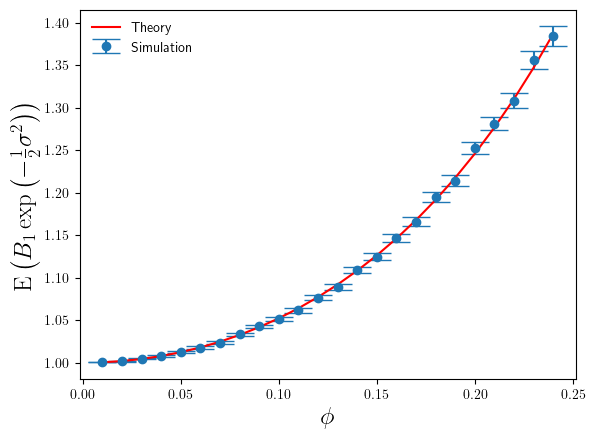

In [4]:
# Plot the simulation estimates of the expectation 
# of the relative error for B_1 with +/- 2standard error error bars
plt.errorbar(phi_seq, 
             expectation_error1,
             yerr=expectation_error1_2SE,
             xerr=None,
             fmt='o',
             capsize = 10,
             label="Simulation")

# Add the theoretical predictions
plt.plot(phi_seq, expectation_error1_theory, 'red', label="Theory")

# Add axes labels and a legend
plt.xlabel(r"$\phi$", fontsize=18)
plt.ylabel(r"${\rm E}\left ( B_{1}\exp\left ( -\frac{1}{2}\sigma^{2}\right )\right)$", fontsize=18)
plt.legend(frameon=False)
plt.show()

Now we'll also compare simulation and theoretical predictions for ${\rm Var}\left ( B_{1}\exp(-\frac{1}{2}\sigma^{2})\right )$. We can see from the plot below that the simulation estimates and theoretical predictions are in close agreement, confirming the validity of the theory.

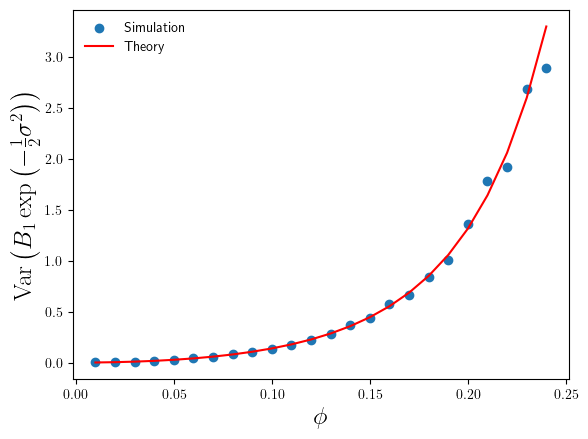

In [5]:
# Plot the simulation estimates of the variance 
# of the relative error B_1
plt.scatter(phi_seq, variance_error1, label="Simulation")

# Add the theoretical predictions to the plot
plt.plot(phi_seq, variance_error1_theory, 'red', label="Theory")

# Add axes labels and a legend
plt.xlabel(r"$\phi$", fontsize=18)
plt.ylabel(r"${\rm Var}\left ( B_{1}\exp\left ( -\frac{1}{2}\sigma^{2}\right )\right )$", fontsize=18)
plt.legend(frameon=False)
plt.show()

We can create the same plots but for the bias correction factor $B_{2}$. 

Below is a plot of simulation and theory estimates of $\mathbb{E}\left ( B_{2}\exp(-\frac{1}{2}\sigma^{2})\right )$ against $\phi$. Error bars are +/- 2 standard errors of the simulation estimates of the expectation. Again we have good agreement between theory and simulation.

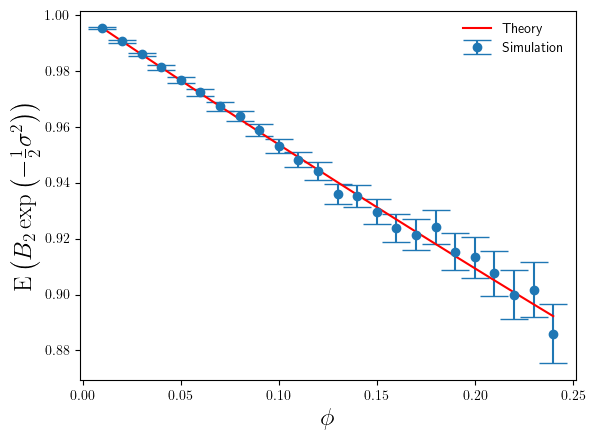

In [6]:
# Plot the simulation estimates of the expectation 
# of the relative error for B_2 with +/- 2standard error error bars
plt.errorbar(phi_seq, 
             expectation_error2,
             yerr=expectation_error2_2SE,
             xerr=None,
             fmt='o',
             capsize = 10,
             label="Simulation")

# Add the theoretical predictions
plt.plot(phi_seq, expectation_error2_theory, 'red', label="Theory")

# Add axes labels and a legend
plt.xlabel(r"$\phi$", fontsize=18)
plt.ylabel(r"${\rm E}\left ( B_{2}\exp\left ( -\frac{1}{2}\sigma^{2}\right )\right)$", fontsize=18)
plt.legend(frameon=False)
plt.show()

Below is a plot of simulation and theory estimates of ${\rm Var}\left ( B_{2}\exp(-\frac{1}{2}\sigma^{2})\right )$ against $\phi$. Again we have good agreement between theory and simulation.

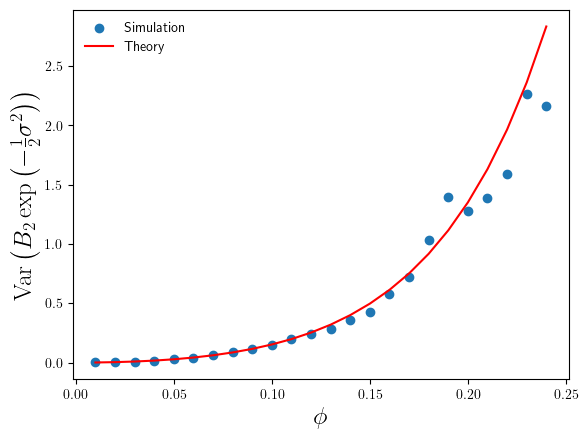

In [7]:
# Plot the simulation estimates of the variance 
# of the relative error B_1
plt.scatter(phi_seq, variance_error2, label="Simulation")

# Add the theoretical predictions to the plot
plt.plot(phi_seq, variance_error2_theory, 'red', label="Theory")

# Add axes labels and a legend
plt.xlabel(r"$\phi$", fontsize=18)
plt.ylabel(r"${\rm Var}\left ( B_{2}\exp\left ( -\frac{1}{2}\sigma^{2}\right )\right )$", fontsize=18)
plt.legend(frameon=False)
plt.show()